# Lab 14: Back propagation using a computation graph

Gradient descent requires the derivative of the cost with respect to each parameter in the network. Neural networks can have millions or even billions of parameters. The back propagation algorithm is used to compute those derivatives. Computation graphs are used to simplify the operation. 

In [2]:
from sympy import *
import numpy as np
import re

# %matplotlib widget
import matplotlib.pyplot as plt
from matplotlib.widgets import TextBox
from matplotlib.widgets import Button
import ipywidgets as widgets

from lib.lab_utils_backprop import *

## Calculate the derivative of J = (2+3w)^2

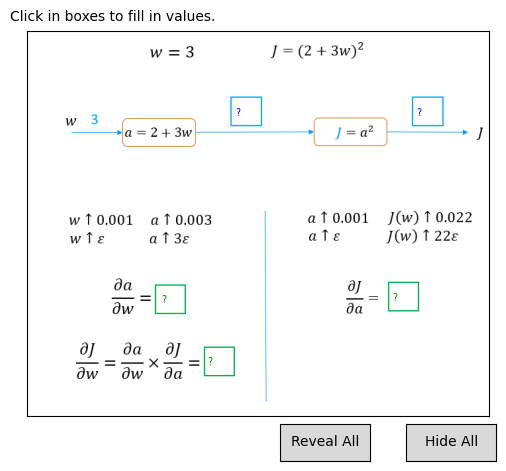

In [3]:
# visually shows how we can break up expressions into computational nodes
plt.close("all")
plt_network(config_nw0, "./images/C2_W2_BP_network0.PNG")

### Forward Propagation

In [4]:
w = 3
a = 2+3*w
J = a**2
print(f"a = {a}, J = {J}")

a = 11, J = 121


### Backward Propagation Arithmetically

In [5]:
a_epsilon = a + 0.001       # a epsilon
J_epsilon = a_epsilon**2    # J_epsilon
k = (J_epsilon - J)/0.001   # difference divided by epsilon
print(f"J = {J}, J_epsilon = {J_epsilon}, dJ_da ~= k = {k} ")

J = 121, J_epsilon = 121.02200099999999, dJ_da ~= k = 22.000999999988835 


### Backward Propagation Symbolically

In [6]:
sw,sJ,sa = symbols('w,J,a')
sJ = sa**2
sJ

a**2

In [7]:
sJ.subs([(sa,a)])

121

In [8]:
dJ_da = diff(sJ, sa)
dJ_da

2*a

### More

In [10]:
# Arithmetically
w_epsilon = w + 0.001       # a  plus a small value, epsilon
a_epsilon = 2 + 3*w_epsilon
k = (a_epsilon - a)/0.001   # difference divided by epsilon
print(f"a = {a}, a_epsilon = {a_epsilon}, da_dw ~= k = {k} ")

a = 11, a_epsilon = 11.003, da_dw ~= k = 3.0000000000001137 


In [11]:
# Symbolically
sa = 2 + 3*sw
sa

3*w + 2

In [12]:
da_dw = diff(sa,sw)
da_dw

3

In [13]:
dJ_dw = da_dw * dJ_da
dJ_dw

6*a

In [14]:
# Check with arithmetic
w_epsilon = w + 0.001
a_epsilon = 2 + 3*w_epsilon
J_epsilon = a_epsilon**2
k = (J_epsilon - J)/0.001   # difference divided by epsilon
print(f"J = {J}, J_epsilon = {J_epsilon}, dJ_dw ~= k = {k} ")

J = 121, J_epsilon = 121.06600900000001, dJ_dw ~= k = 66.0090000000082 


## Computational Graph of a Simple Neural Network

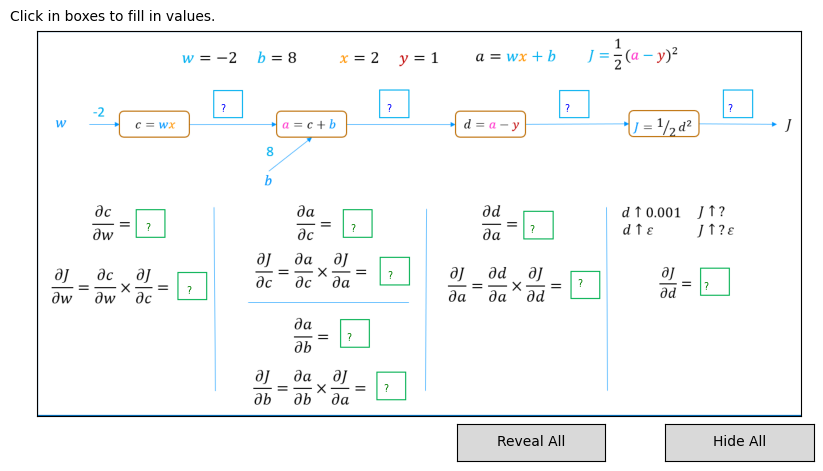

In [15]:
plt.close("all")
plt_network(config_nw1, "./images/C2_W2_BP_network1.PNG")

### Forward Propagation

In [16]:
# Inputs and parameters
x = 2
w = -2
b = 8
y = 1
# calculate per step values   
c = w * x
a = c + b
d = a - y
J = d**2/2
print(f"J={J}, d={d}, a={a}, c={c}")

J=4.5, d=3, a=4, c=-4


### Backward Propagation

In [17]:
# Arithmetically
d_epsilon = d + 0.001
J_epsilon = d_epsilon**2/2
k = (J_epsilon - J)/0.001   # difference divided by epsilon
print(f"J = {J}, J_epsilon = {J_epsilon}, dJ_dd ~= k = {k} ")

J = 4.5, J_epsilon = 4.5030005, dJ_dd ~= k = 3.0004999999997395 


In [18]:
# Symbolically
sx,sw,sb,sy,sJ = symbols('x,w,b,y,J')
sa, sc, sd = symbols('a,c,d')
sJ = sd**2/2
sJ

d**2/2

In [19]:
sJ.subs([(sd,d)])

9/2

In [20]:
dJ_dd = diff(sJ, sd)
dJ_dd

d

In [21]:
# Arithmetically
a_epsilon = a + 0.001         # a  plus a small value
d_epsilon = a_epsilon - y
k = (d_epsilon - d)/0.001   # difference divided by epsilon
print(f"d = {d}, d_epsilon = {d_epsilon}, dd_da ~= k = {k} ")

d = 3, d_epsilon = 3.0010000000000003, dd_da ~= k = 1.000000000000334 


In [23]:
# Symbolically
sd = sa - sy
sd

a - y

In [24]:
dd_da = diff(sd,sa)
dd_da

1

In [25]:
# next step
dJ_da = dd_da * dJ_dd
dJ_da

d

In [26]:
# check arithmetically
a_epsilon = a + 0.001
d_epsilon = a_epsilon - y
J_epsilon = d_epsilon**2/2
k = (J_epsilon - J)/0.001   
print(f"J = {J}, J_epsilon = {J_epsilon}, dJ_da ~= k = {k} ")

J = 4.5, J_epsilon = 4.503000500000001, dJ_da ~= k = 3.0005000000006277 


In [27]:
# calculate the local derivatives da_dc, da_db
sa = sc + sb
sa

b + c

In [28]:
da_dc = diff(sa,sc)
da_db = diff(sa,sb)
print(da_dc, da_db)

1 1


In [29]:
dJ_dc = da_dc * dJ_da
dJ_db = da_db * dJ_da
print(f"dJ_dc = {dJ_dc},  dJ_db = {dJ_db}")

dJ_dc = d,  dJ_db = d


In [30]:
# calculate the local derivative
sc = sw * sx
sc

w*x

In [31]:
dc_dw = diff(sc,sw)
dc_dw

x

In [32]:
dJ_dw = dc_dw * dJ_dc
dJ_dw

d*x

In [33]:
print(f"dJ_dw = {dJ_dw.subs([(sd,d),(sx,x)])}")

dJ_dw = 2*d


In [34]:
# check arithmetically
J_epsilon = ((w+0.001)*x+b - y)**2/2
k = (J_epsilon - J)/0.001  
print(f"J = {J}, J_epsilon = {J_epsilon}, dJ_dw ~= k = {k} ")

J = 4.5, J_epsilon = 4.506002, dJ_dw ~= k = 6.001999999999619 
